In [1]:
import pandas as pd
import numpy as np
import os
import folium
from folium import plugins
import webbrowser
from folium.plugins import HeatMap
import geopandas as gp
import shapefile as shp

Open the file. Open Public art, Street art, Slave trade to observe what data inside it. Our goal is to cope with the date and positions of arts in Edinburgh.

In [2]:
#read the file
PublicData = pd.read_csv("Public art.csv")
PublicData

,Title / subject,y,x,Date,Location,Artist / designer,Type,Material,Dimensions,Designation,Collection,Notes,Images,Source
0,Monument to John Playfair,55.9548,-3.183000,1825-6,NaN,William Henry Playfair,Square-plan Greek Doric monument,Polished ashlar,NaN,Category A-listed,NaN,Incorporated in observatory compound wall[1],https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/List_of_public_a...
1,Monument to Dugald Stewart,55.9545,-3.184500,1831,NaN,William Henry Playfair,Circular Greek-revival Corinthian monument,Polished ashlar,NaN,Category A-listed,NaN,Based on the Choragic Monument of Lysicrates i...,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/List_of_public_a...
2,Monument to Robert Burns,55.9535,-3.178300,1831-9,NaN,Thomas Hamilton,Circular Greek-revival Corinthian monument,Ashlar sandstone,NaN,Category A-listed,NaN,Based on the Choragic Monument of Lysicrates i...,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/List_of_public_a...
3,Political Martyrs' Monument,55.9534,-3.185800,1844,NaN,Thomas Hamilton,Obelisk,NaN,NaN,Category A-listed (as part of Old Calton Buria...,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/List_of_public_a...
4,Scottish-American Soldiers' Monument,55.9535,-3.186100,1893,NaN,George Edwin Bissell,Statue with subsidiary sculpture,Bronze figures on red granite pedestal,NaN,Category A-listed (as part of Old Calton Buria...,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/List_of_public_a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Crew Building Relief,55.923065,-3.177520,c.1926-32,King's Buildings,Charles d'Orville Pilkington-Jackson,NaN,NaN,NaN,NaN,University of Edinburgh Art Collection,The figurative relief carving to the building'...,https://images.is.ed.ac.uk/luna/servlet/iiif/U...,NaN
143,Startled Horse Rising,55.864532,-3.200328,1833,Easter Bush,Sir John Steell,NaN,NaN,NaN,NaN,University of Edinburgh Art Collection,"Stone sculpture of a horse, lying on the groun...",https://images.is.ed.ac.uk/luna/servlet/iiif/U...,NaN
144,William Dick,55.865794,-3.201039,1883,Easter Bush,John Rhind,NaN,Stone,NaN,NaN,University of Edinburgh Art Collection,Sculpture of former Vetinary surgeon and found...,https://images.is.ed.ac.uk/luna/servlet/iiif/U...,NaN
145,Sprinting Afghan Hound,55.864975,-3.201746,1996,Easter Bush,Mathew Lane Sanderson,NaN,Bronze,NaN,NaN,University of Edinburgh Art Collection,"Sprinting afghan hound, hair flowing behind it...",https://images.is.ed.ac.uk/luna/servlet/iiif/U...,NaN


In [3]:
StreetData = pd.read_csv("Street art.csv")
StreetData

,name,Category,State,Address,Artist,Summary,Year,website,Y,X,Image,Unnamed: 11,Unnamed: 12
0,Leith History Mural,Street art,Existing,"21 N Jct St, Edinburgh EH6 6HW",Tim Chalk & Paul Grime,NaN,NaN,NaN,55.975789,-3.179434,https://images.squarespace-cdn.com/content/v1/...,NaN,NaN
1,Horne Terrace Mural,Street art,Erased,"2 Horne Terrace, Edinburgh EH11 1JW",Robert Callender,On a gable end is an engrossing hyper-realisti...,NaN,https://www.edinburghnews.scotsman.com/news/pe...,55.939979,-3.213681,https://www.edinburghnews.scotsman.com/images-...,NaN,NaN
2,Colinton Station and Tunnel (site of),Street art,Existing,Edinburgh EH13 0JX,Chris Rutterford,NaN,NaN,https://www.edinburghnews.scotsman.com/news/pe...,55.907897,-3.260054,https://i.imgur.com/CWdSlst.jpg,NaN,NaN
3,Spylaw park mural,Street art,Existing,Edinburgh EH13 0JX,Firhill high school,Mural by Firrhill high school. Commisioned by ...,NaN,https://edwinglucas.com/news-spylaw-park-mural...,55.907430,-3.260413,https://edwinglucas.com/uploads/3/5/5/6/355692...,NaN,NaN
4,Never Ordinary,Street art,Existing,"Candlemaker Row, Edinburgh EH1 2QE",Paramount Pictures,NaN,NaN,NaN,55.947394,-3.192042,https://nen.press/wp-content/uploads/2019/09/N...,NaN,NaN
5,Capita Mural,Street art,Existing,"145 Morrison Street, Edinburgh",Chris Rutterford,NaN,NaN,NaN,55.945689,-3.211781,http://nen.press/wp-content/uploads/2019/09/Ca...,NaN,NaN
6,Wildlife Mural,Street art,Existing,"Bridge 8 Hub, Edinburgh",Rouge Oner,NaN,NaN,NaN,55.918382,-3.299983,https://nen.press/wp-content/uploads/2019/09/W...,NaN,NaN
7,Etza Skull,Street art,Existing,"Marine Parade Graffiti Wall, Edinburgh",Etza,NaN,NaN,NaN,55.979919,-3.185874,https://i2-prod.edinburghlive.co.uk/incoming/a...,NaN,NaN
8,Eduardo Paolozzi,Street art,Existing,77 Henderson St,Russell Ian Dempster,NaN,NaN,https://www.scotsman.com/arts-and-culture/scot...,55.974585,-3.172151,https://i2-prod.edinburghlive.co.uk/incoming/a...,NaN,NaN
9,Gifford Park Mural,Street art,Existing,"37 Clerk St, Newington, Edinburgh EH8 9JQ",Kate George,NaN,NaN,NaN,55.942136,-3.182363,https://i2-prod.edinburghlive.co.uk/incoming/a...,NaN,NaN


In [4]:
print (PublicData.dtypes)
print (StreetData.dtypes)

Title / subject       object
y                     object
x                    float64
Date                  object
Location              object
Artist / designer     object
Type                  object
Material              object
Dimensions            object
Designation           object
Collection            object
Notes                 object
Images                object
Source                object
dtype: object
name            object
Category        object
State           object
Address         object
Artist          object
Summary         object
Year           float64
website         object
Y              float64
X              float64
Image           object
Unnamed: 11    float64
Unnamed: 12     object
dtype: object


The date in public art.csv is complex with different formats, like some showing date with '/', while others showing with '-'. Also, according to our goal, the data we need is the year. So we decided to only keep the year part.

In [5]:
PublicData['Date'] = PublicData['Date'].str.split('(').str[0]
PublicData['Date'] = PublicData['Date'].str.split('-').str[0]
PublicData['Date'] = PublicData['Date'].str.split('–').str[0]
PublicData['Date'] = PublicData['Date'].str.split('/').str[0]

In [6]:
PublicData['Date'] = PublicData['Date'].str.strip('c.')
PublicData['Date'] = PublicData['Date'].str.strip('Erected ')

In [7]:
PublicData['Date'] = PublicData['Date'].str.split('.').str[0]
PublicData['Date']
print(PublicData.dtypes)

Title / subject       object
y                     object
x                    float64
Date                  object
Location              object
Artist / designer     object
Type                  object
Material              object
Dimensions            object
Designation           object
Collection            object
Notes                 object
Images                object
Source                object
dtype: object


Change the year object format into the float which is easy to select from centuries by centuries.

In [8]:
#data['y'] = pd.to_numeric(data['y']) 
PublicData['y'] = PublicData['y'].str.replace(',','').astype(float)
print(PublicData["y"].dtypes)
#data

float64


In [9]:
PublicData['Date'] = PublicData['Date'].str.replace('s','').astype(float)
print(PublicData["Date"].dtypes)

float64


Clean the data about missing data(remove Holodomor Memorial Stone & Gulliver in Edinburgh)

In [10]:
PublicData=PublicData.drop(PublicData[(PublicData['Title / subject']=='Holodomor Memorial Stone')].index)
PublicData=PublicData.drop(PublicData[(PublicData['Title / subject']=='Gulliver in Edinburgh')].index)
PublicData

,Title / subject,y,x,Date,Location,Artist / designer,Type,Material,Dimensions,Designation,Collection,Notes,Images,Source
0,Monument to John Playfair,55.954800,-3.183000,1825.0,NaN,William Henry Playfair,Square-plan Greek Doric monument,Polished ashlar,NaN,Category A-listed,NaN,Incorporated in observatory compound wall[1],https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/List_of_public_a...
1,Monument to Dugald Stewart,55.954500,-3.184500,1831.0,NaN,William Henry Playfair,Circular Greek-revival Corinthian monument,Polished ashlar,NaN,Category A-listed,NaN,Based on the Choragic Monument of Lysicrates i...,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/List_of_public_a...
2,Monument to Robert Burns,55.953500,-3.178300,1831.0,NaN,Thomas Hamilton,Circular Greek-revival Corinthian monument,Ashlar sandstone,NaN,Category A-listed,NaN,Based on the Choragic Monument of Lysicrates i...,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/List_of_public_a...
3,Political Martyrs' Monument,55.953400,-3.185800,1844.0,NaN,Thomas Hamilton,Obelisk,NaN,NaN,Category A-listed (as part of Old Calton Buria...,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/List_of_public_a...
4,Scottish-American Soldiers' Monument,55.953500,-3.186100,1893.0,NaN,George Edwin Bissell,Statue with subsidiary sculpture,Bronze figures on red granite pedestal,NaN,Category A-listed (as part of Old Calton Buria...,NaN,NaN,https://upload.wikimedia.org/wikipedia/commons...,https://en.wikipedia.org/wiki/List_of_public_a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Crew Building Relief,55.923065,-3.177520,1926.0,King's Buildings,Charles d'Orville Pilkington-Jackson,NaN,NaN,NaN,NaN,University of Edinburgh Art Collection,The figurative relief carving to the building'...,https://images.is.ed.ac.uk/luna/servlet/iiif/U...,NaN
143,Startled Horse Rising,55.864532,-3.200328,1833.0,Easter Bush,Sir John Steell,NaN,NaN,NaN,NaN,University of Edinburgh Art Collection,"Stone sculpture of a horse, lying on the groun...",https://images.is.ed.ac.uk/luna/servlet/iiif/U...,NaN
144,William Dick,55.865794,-3.201039,1883.0,Easter Bush,John Rhind,NaN,Stone,NaN,NaN,University of Edinburgh Art Collection,Sculpture of former Vetinary surgeon and found...,https://images.is.ed.ac.uk/luna/servlet/iiif/U...,NaN
145,Sprinting Afghan Hound,55.864975,-3.201746,1996.0,Easter Bush,Mathew Lane Sanderson,NaN,Bronze,NaN,NaN,University of Edinburgh Art Collection,"Sprinting afghan hound, hair flowing behind it...",https://images.is.ed.ac.uk/luna/servlet/iiif/U...,NaN


In [11]:
PublicData.drop(['Location', 'Artist / designer',
'Type', 'Material','Dimensions', 'Designation','Collection','Notes','Images','Source'], axis=1, inplace = True)

PublicData

,Title / subject,y,x,Date
0,Monument to John Playfair,55.954800,-3.183000,1825.0
1,Monument to Dugald Stewart,55.954500,-3.184500,1831.0
2,Monument to Robert Burns,55.953500,-3.178300,1831.0
3,Political Martyrs' Monument,55.953400,-3.185800,1844.0
4,Scottish-American Soldiers' Monument,55.953500,-3.186100,1893.0
...,...,...,...,...
142,Crew Building Relief,55.923065,-3.177520,1926.0
143,Startled Horse Rising,55.864532,-3.200328,1833.0
144,William Dick,55.865794,-3.201039,1883.0
145,Sprinting Afghan Hound,55.864975,-3.201746,1996.0


In [12]:
PublicData['Sort']='Public art'
PublicData

,Title / subject,y,x,Date,Sort
0,Monument to John Playfair,55.954800,-3.183000,1825.0,Public art
1,Monument to Dugald Stewart,55.954500,-3.184500,1831.0,Public art
2,Monument to Robert Burns,55.953500,-3.178300,1831.0,Public art
3,Political Martyrs' Monument,55.953400,-3.185800,1844.0,Public art
4,Scottish-American Soldiers' Monument,55.953500,-3.186100,1893.0,Public art
...,...,...,...,...,...
142,Crew Building Relief,55.923065,-3.177520,1926.0,Public art
143,Startled Horse Rising,55.864532,-3.200328,1833.0,Public art
144,William Dick,55.865794,-3.201039,1883.0,Public art
145,Sprinting Afghan Hound,55.864975,-3.201746,1996.0,Public art


In [13]:
StreetData.drop(['Category','State',
'Address', 'Artist', 'Summary','website','Image','Unnamed: 11','Unnamed: 12'], axis=1, inplace = True)
StreetData

,name,Year,Y,X
0,Leith History Mural,NaN,55.975789,-3.179434
1,Horne Terrace Mural,NaN,55.939979,-3.213681
2,Colinton Station and Tunnel (site of),NaN,55.907897,-3.260054
3,Spylaw park mural,NaN,55.907430,-3.260413
4,Never Ordinary,NaN,55.947394,-3.192042
5,Capita Mural,NaN,55.945689,-3.211781
6,Wildlife Mural,NaN,55.918382,-3.299983
7,Etza Skull,NaN,55.979919,-3.185874
8,Eduardo Paolozzi,NaN,55.974585,-3.172151
9,Gifford Park Mural,NaN,55.942136,-3.182363


In [14]:
StreetData['Sort']='Street art'
StreetData

,name,Year,Y,X,Sort
0,Leith History Mural,NaN,55.975789,-3.179434,Street art
1,Horne Terrace Mural,NaN,55.939979,-3.213681,Street art
2,Colinton Station and Tunnel (site of),NaN,55.907897,-3.260054,Street art
3,Spylaw park mural,NaN,55.907430,-3.260413,Street art
4,Never Ordinary,NaN,55.947394,-3.192042,Street art
5,Capita Mural,NaN,55.945689,-3.211781,Street art
6,Wildlife Mural,NaN,55.918382,-3.299983,Street art
7,Etza Skull,NaN,55.979919,-3.185874,Street art
8,Eduardo Paolozzi,NaN,55.974585,-3.172151,Street art
9,Gifford Park Mural,NaN,55.942136,-3.182363,Street art


In [15]:
PublicData.rename(columns={"Title / subject":"Name"}, inplace=True)
PublicData

,Name,y,x,Date,Sort
0,Monument to John Playfair,55.954800,-3.183000,1825.0,Public art
1,Monument to Dugald Stewart,55.954500,-3.184500,1831.0,Public art
2,Monument to Robert Burns,55.953500,-3.178300,1831.0,Public art
3,Political Martyrs' Monument,55.953400,-3.185800,1844.0,Public art
4,Scottish-American Soldiers' Monument,55.953500,-3.186100,1893.0,Public art
...,...,...,...,...,...
142,Crew Building Relief,55.923065,-3.177520,1926.0,Public art
143,Startled Horse Rising,55.864532,-3.200328,1833.0,Public art
144,William Dick,55.865794,-3.201039,1883.0,Public art
145,Sprinting Afghan Hound,55.864975,-3.201746,1996.0,Public art


In [16]:
StreetData.rename(columns = {"name": "Name", "Year":"Date","Y":"y","X":"x"},  inplace=True)
StreetData

,Name,Date,y,x,Sort
0,Leith History Mural,NaN,55.975789,-3.179434,Street art
1,Horne Terrace Mural,NaN,55.939979,-3.213681,Street art
2,Colinton Station and Tunnel (site of),NaN,55.907897,-3.260054,Street art
3,Spylaw park mural,NaN,55.907430,-3.260413,Street art
4,Never Ordinary,NaN,55.947394,-3.192042,Street art
5,Capita Mural,NaN,55.945689,-3.211781,Street art
6,Wildlife Mural,NaN,55.918382,-3.299983,Street art
7,Etza Skull,NaN,55.979919,-3.185874,Street art
8,Eduardo Paolozzi,NaN,55.974585,-3.172151,Street art
9,Gifford Park Mural,NaN,55.942136,-3.182363,Street art


In [17]:
print(PublicData.dtypes)

Name     object
y       float64
x       float64
Date    float64
Sort     object
dtype: object


In [18]:
pd.concat([PublicData,StreetData],axis=0)

,Name,y,x,Date,Sort
0,Monument to John Playfair,55.954800,-3.183000,1825.0,Public art
1,Monument to Dugald Stewart,55.954500,-3.184500,1831.0,Public art
2,Monument to Robert Burns,55.953500,-3.178300,1831.0,Public art
3,Political Martyrs' Monument,55.953400,-3.185800,1844.0,Public art
4,Scottish-American Soldiers' Monument,55.953500,-3.186100,1893.0,Public art
...,...,...,...,...,...
28,Poseidon,55.980129,-3.218357,2019.0,Street art
29,Figgate Park Wild life,55.951000,-3.122000,2015.0,Street art
30,Figgate Park Wild life,55.950000,-3.128000,2015.0,Street art
31,Figgate Park Wild life,55.951000,-3.126000,2015.0,Street art


In [19]:
ArtData=pd.concat([PublicData,StreetData],axis=0)

In [20]:
ArtData.dropna(axis=0, how='any')
ArtData

,Name,y,x,Date,Sort
0,Monument to John Playfair,55.954800,-3.183000,1825.0,Public art
1,Monument to Dugald Stewart,55.954500,-3.184500,1831.0,Public art
2,Monument to Robert Burns,55.953500,-3.178300,1831.0,Public art
3,Political Martyrs' Monument,55.953400,-3.185800,1844.0,Public art
4,Scottish-American Soldiers' Monument,55.953500,-3.186100,1893.0,Public art
...,...,...,...,...,...
28,Poseidon,55.980129,-3.218357,2019.0,Street art
29,Figgate Park Wild life,55.951000,-3.122000,2015.0,Street art
30,Figgate Park Wild life,55.950000,-3.128000,2015.0,Street art
31,Figgate Park Wild life,55.951000,-3.126000,2015.0,Street art


In [21]:
print(ArtData.dtypes)

Name     object
y       float64
x       float64
Date    float64
Sort     object
dtype: object


In [22]:
ArtData.to_csv('Publicart final.csv')

In [23]:
ArtData1700=ArtData.loc[ArtData['Date']<=1800]
ArtData1700

,Name,y,x,Date,Sort
15,Monument to Carl Linnaeus,55.966842,-3.207415,1778.0,Public art
42,Charles II,55.949200,-3.190500,1685.0,Public art


In [24]:
ArtData1700.to_csv('Publicart final1700.csv')

In [25]:
ArtData1800=ArtData.loc[(ArtData['Date']<=1900) & (ArtData['Date']>1800)]
ArtData1800

,Name,y,x,Date,Sort
0,Monument to John Playfair,55.954800,-3.183000,1825.0,Public art
1,Monument to Dugald Stewart,55.954500,-3.184500,1831.0,Public art
2,Monument to Robert Burns,55.953500,-3.178300,1831.0,Public art
3,Political Martyrs' Monument,55.953400,-3.185800,1844.0,Public art
4,Scottish-American Soldiers' Monument,55.953500,-3.186100,1893.0,Public art
7,Covenanters’ Memorial,55.904680,-3.238737,1885.0,Public art
13,Mausoleum of William Henry Miller,55.957100,-3.137200,1848.0,Public art
23,Robert Burns,55.975400,-3.166800,1897.0,Public art
27,"John Hope, 4th Earl of Hopetoun",55.954500,-3.191700,1834.0,Public art
28,"Monument to Henry Dundas, 1st Viscount Melville",55.954200,-3.193200,1817.0,Public art


In [26]:
ArtData1800.to_csv('Publicart final1800.csv')

In [27]:
ArtData1900=ArtData.loc[(ArtData['Date']<=2000) & (ArtData['Date']>1900)]
ArtData1900

,Name,y,x,Date,Sort
16,Ascending Form (Gloria),55.964916,-3.204378,1958.0,Public art
17,Rock Form (Porthcurno),55.964718,-3.206889,1964.0,Public art
18,Umbra solis,55.965080,-3.210991,1975.0,Public art
19,"Slate, Hole, Wall",55.962917,-3.211345,1990.0,Public art
20,Cone,55.965110,-3.209825,1990.0,Public art
...,...,...,...,...,...
141,Geology,55.924015,-3.174405,1931.0,Public art
142,Crew Building Relief,55.923065,-3.177520,1926.0,Public art
145,Sprinting Afghan Hound,55.864975,-3.201746,1996.0,Public art
18,Untitled Mural,55.973644,-3.170588,1984.0,Street art


In [28]:
ArtData1900.to_csv('Publicart final1900.csv')

In [29]:
ArtData2000=ArtData.loc[ArtData['Date']>2000]
ArtData2000

,Name,y,x,Date,Sort
5,Stones of Scotland Circle,55.954900,-3.174500,2002.0,Public art
8,Memorial to Robert Louis Stevenson,55.908597,-3.256297,2013.0,Public art
9,Memorial to Army pipers killed in conflict,55.909542,-3.249274,2013.0,Public art
10,Alan Breck Stewart & David Balfour. Characters...,55.945030,-3.249841,2004.0,Public art
12,Nils Olav (penguin soldier),55.944117,-3.271337,2005.0,Public art
14,The Cramond Fish,55.979722,-3.294227,2009.0,Public art
25,6 Times,55.983600,-3.176360,2010.0,Public art
38,Dreaming Spires,55.956344,-3.186225,2005.0,Public art
39,Lion of Scotland,55.954623,-3.193084,2006.0,Public art
40,James Clerk Maxwell,55.954053,-3.194381,2006.0,Public art


In [30]:
ArtData2000.to_csv('Publicart final2000.csv')

In [31]:
ArtDataFinal=pd.concat([ArtData1700,ArtData1800,ArtData1900,ArtData2000],axis=0)
ArtDataFinal

,Name,y,x,Date,Sort
15,Monument to Carl Linnaeus,55.966842,-3.207415,1778.0,Public art
42,Charles II,55.949200,-3.190500,1685.0,Public art
0,Monument to John Playfair,55.954800,-3.183000,1825.0,Public art
1,Monument to Dugald Stewart,55.954500,-3.184500,1831.0,Public art
2,Monument to Robert Burns,55.953500,-3.178300,1831.0,Public art
...,...,...,...,...,...
28,Poseidon,55.980129,-3.218357,2019.0,Street art
29,Figgate Park Wild life,55.951000,-3.122000,2015.0,Street art
30,Figgate Park Wild life,55.950000,-3.128000,2015.0,Street art
31,Figgate Park Wild life,55.951000,-3.126000,2015.0,Street art


In [32]:
ArtDataFinal2 = ArtDataFinal.set_index('Name', inplace=False)
ArtDataFinal2

,y,x,Date,Sort
Name,,,,
Monument to Carl Linnaeus,55.966842,-3.207415,1778.0,Public art
Charles II,55.949200,-3.190500,1685.0,Public art
Monument to John Playfair,55.954800,-3.183000,1825.0,Public art
Monument to Dugald Stewart,55.954500,-3.184500,1831.0,Public art
Monument to Robert Burns,55.953500,-3.178300,1831.0,Public art
...,...,...,...,...
Poseidon,55.980129,-3.218357,2019.0,Street art
Figgate Park Wild life,55.951000,-3.122000,2015.0,Street art
Figgate Park Wild life,55.950000,-3.128000,2015.0,Street art


In [33]:
ArtDataFinal3=ArtDataFinal2.reset_index()
ArtDataFinal3

,Name,y,x,Date,Sort
0,Monument to Carl Linnaeus,55.966842,-3.207415,1778.0,Public art
1,Charles II,55.949200,-3.190500,1685.0,Public art
2,Monument to John Playfair,55.954800,-3.183000,1825.0,Public art
3,Monument to Dugald Stewart,55.954500,-3.184500,1831.0,Public art
4,Monument to Robert Burns,55.953500,-3.178300,1831.0,Public art
...,...,...,...,...,...
147,Poseidon,55.980129,-3.218357,2019.0,Street art
148,Figgate Park Wild life,55.951000,-3.122000,2015.0,Street art
149,Figgate Park Wild life,55.950000,-3.128000,2015.0,Street art
150,Figgate Park Wild life,55.951000,-3.126000,2015.0,Street art


In [34]:
ArtDataFinal3.to_csv('Publicart final(without year NaN).csv')

Plot

In [35]:
EdiMap = folium.Map(location=[ArtDataFinal3['y'].mean(), ArtDataFinal3['x'].mean()], zoom_start=12,
                 # tiles="http://{s}.tile.stamen.com/watercolor/{z}/{x}/{y}.jpg",
                    tiles='Stamen Terrain',
                    attr="default")
marker_cluster = plugins.MarkerCluster().add_to(EdiMap)
display(EdiMap)

#mark points
for name,row in ArtDataFinal3.iterrows():
     folium.Marker([row["y"], row["x"]], popup="{0}:{1}".format(row["Name"], 1)).add_to(marker_cluster) 
display(EdiMap)
EdiMap.save('map.html')
webbrowser.open('map.html')

True

In [36]:
num=ArtDataFinal3.shape[0]
lat = np.array(ArtDataFinal3["y"][0:num])                        # 获取维度之维度值
lon = np.array(ArtDataFinal3["x"][0:num])                        # 获取经度值

data1 = [[lat[i],lon[i]] for i in range(num)]    #将数据制作成[lats,lons,weights]的形式

Map_heat = folium.Map(location=[ArtDataFinal3['y'].mean(), ArtDataFinal3['x'].mean()],zoom_start=12)    #绘制Map，开始缩放程度是5倍
HeatMap(data1).add_to(Map_heat)  
display(Map_heat)
Map_heat.save('map2.html')
webbrowser.open('map2.html')

True

In [37]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

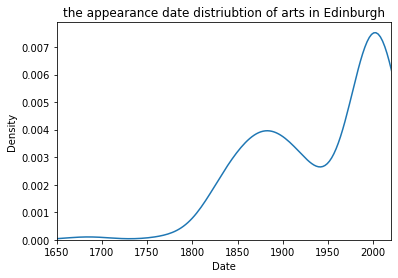

In [61]:
chart = sns.kdeplot(ArtDataFinal3['Date'])
plt.xlim(1650,2020)
chart.set_title('the appearance date distriubtion of arts in Edinburgh')
plt.savefig('the appearance date distriubtion of arts in Edinburgh.png')
plt.show()

In [39]:
print(ArtData1700.shape[0],
                         ArtData1800.shape[0],
                        ArtData1900.shape[0],
                    ArtData2000.shape[0])

2 46 61 43


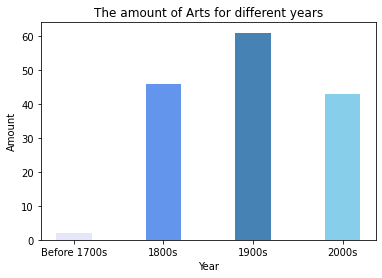

In [73]:
X=['Before 1700s','1800s','1900s','2000s']
Y=[ArtData1700.shape[0],
                         ArtData1800.shape[0],
                        ArtData1900.shape[0],
                    ArtData2000.shape[0]]  
fig = plt.figure()
colors = ['lavender', 'cornflowerblue', 'steelblue', 'skyblue']
plt.bar(X,Y,0.4,color=colors)
plt.xlabel("Year")
plt.ylabel("Amount")
plt.title("The amount of Arts for different years")
plt.savefig('The amount of Arts for different years.png')
plt.show()

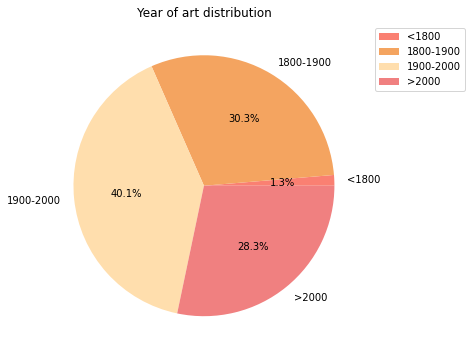

In [41]:
plt.figure(figsize=(8, 6))                    #画图，大小可自己设置
DateData= {'Date': ['1700','1800', '1900', '2000'],
           'count': [ArtData1700.shape[0],
                         ArtData1800.shape[0],
                        ArtData1900.shape[0],
                    ArtData2000.shape[0]]
           }
dataframe_1 = pd.DataFrame(DateData)
colors = ['salmon', 'sandybrown', 'navajowhite', 'lightcoral']
labels = dataframe_1['count']
x = dataframe_1['Date']
plt.pie(labels, labels=['<1800','1800-1900', '1900-2000', '>2000'], autopct='%1.1f%%',colors=colors)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Year of art distribution')
plt.savefig('Year distribution pie.png')
plt.show()


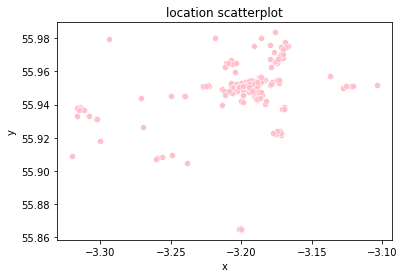

In [42]:
sns.scatterplot(x="x", y="y",data=ArtData,color='pink')
plt.title('location scatterplot')
plt.savefig('location distribution scatterplot.png')
plt.show()